In [1172]:
import os
import json
import requests
from src.najdi_rok import najdi_rok
from src.irozhlas_graf import irozhlas_graf
import pandas as pd

In [1173]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Příprava dat

In [1175]:
odkud = 'data_raw/nobelistvo'

In [1176]:
df = pd.DataFrame()
for f in os.listdir(odkud):
    pracovni = pd.read_parquet(os.path.join(odkud, f))
    kod = f.split('_')[2].split('.')[0]
    pracovni = pracovni[pracovni['100_7'].astype(str).str.contains(kod, na=False)]
    if len(pracovni) == 0:
        print(f"{f}: nulová délka")
    df = pd.concat([df, pracovni])

nobelovka_1977_jn19990000099.parquet: nulová délka


C:\Users\micha\AppData\Local\Temp\ipykernel_32712\3977322801.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pracovni])
C:\Users\micha\AppData\Local\Temp\ipykernel_32712\3977322801.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pracovni])


In [1177]:
df['titul'].sample()

001
bk194701285    Nelítostný zápas
Name: titul, dtype: object

In [1178]:
df['titul'] = df['titul'].apply(lambda x: x.replace('=','').strip())

In [1179]:
df['titul'].sample(5)

001
cpk19960116774               Bludná hvězda
ck8604757                    Gösta Berling
ck8706491         Šel malíř chudě do světa
nkc20092009774               Most na Drině
np9415286             Tajemství Frontenaků
Name: titul, dtype: object

In [1180]:
df = df[~df['titul'].isin(['Peter und Lutz','Primeval and other times',"Oni sražalis' za rodinu","L'étranger =","Crainquebille, Putois et Le Christ de l'Océan","L'Arrabbiata","Madame D'Ora",'Die verlorene Ehre der Katharina Blum =','On the waves of TSF','Neuland unter dem Pflug'])]

In [1181]:
df.loc[df['008'] == '150413q20142015xr     g      000 p cze', 'rok']=2014

In [1182]:
koho = pd.read_json(os.path.join('data_raw','wikidata_nobelovky_pro_filtr.json'))

In [1183]:
koho

,024_a,nobelovka,100_7
0,Q42247,1901,xx0005044
1,Q25351,1902,skuk0000903
2,Q46405,1903,jn19990000824
3,Q42596,1904,jo20000080728
4,Q127349,1904,jn20020220002
5,Q41502,1905,jn19990007946
6,Q43440,1906,jn20000700279
7,Q34743,1907,jn19990004353
8,Q47695,1908,skuk0000369
9,Q44519,1909,jn19990004817


In [1184]:
koho.loc[koho['nobelovka'] == 2018, 'nobelovka']=2019

In [1185]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [1186]:
df = df.explode(['100_a','100_7'])

In [1187]:
df['100_a'] = df['100_a'].apply(lambda x: x[:-1] if x != None else None)

In [1188]:
df['titul'].sample(5)

001
nkc20081818395          Čapka s rolničkami
nos190120864003              Kniha džunglí
bk192700690                   Jindřich IV.
cpk19990652385     Oscar Wilde in memoriam
bknzdr23847                      Môj život
Name: titul, dtype: object

In [1189]:
df[~df['100_a'].str.contains(',',na=False)]

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193705303,990507s1937 xr 000 | cze,[0],Sully Prudhomme,xx0005044,[aut],[1839-1907],None,None,None,None,[1],[0],[Marná laskání /],None,[Sully-Prudhomme ; úvod napsal Václav Černý ; ...,None,None,None,None,None,None,"[1, 1]","[Černý, Václav,, Kadlec, Svatopluk,]","[aui, trl]","[1905-1987, 1898-1971]","[jk01021636, jk01052449]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1937.0,1901,Marná laskání
bk194002023,990514s1940 xr cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Salka Valka :],[Islandské děvče : Román /],[Napsal Halldór Kiljan Laxness ; Přeložila M. ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1940.0,1955,Salka Valka
bk194902261,981025s1949 xr ||| 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Svobodný lid /],None,[Halldór Laxness ; [Z dán.] přel. a doslov nap...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1949.0,1955,Svobodný lid
bk194903682,981117s1949 xr 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Úsvit nad slatinami /],None,[Halldór Laxness ; [Z dán. orig.] přel. a dosl...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1949.0,1955,Úsvit nad slatinami
bk195504372,981116s1955 xr cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Islandský zvon /],None,[Halldór Laxness ; Z islandských orig. Íslands...,None,None,None,None,None,None,[1],"[Rak, Jan,]",[aui],[1920-],[jk01101981],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1955.0,1955,Islandský zvon
bk195603733,981127s1956 xr e 000 d cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Prodaná ukolébavka :],[Hra o 4 dějstvích a 6 obrazech /],[Naps. Halldor Laxness ; [Z islandského orig. ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1956.0,1955,Prodaná ukolébavka
bk195701964,981014s1957 xr ||| 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Atomová stanice /],None,[[Autor:] Halldór Kiljan Laxness ; z dán. přek...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1957.0,1955,Atomová stanice
bk195905082,980902s1959 xr 000 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Světlo světa /],None,[Halldór Kiljan Laxness ; [přeložil Jan Rak]],None,None,None,None,None,None,[1],"[Rak, Jan,]",[trl],[1920-],[jk01101981],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1959.0,1955,Světlo světa
bk196203875,980710s1962 xr ||| | cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Gerpla :],[Hrdinská sága /],[Halldór Kiljan Laxness ; Ze švédského orig. G...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1962.0,1955,Gerpla


In [1190]:
df['100_a'] = df['100_a'].apply(lambda x: f"{x.split(',')[1]} {x.split(',')[0]}" if ',' in x else x)

In [1191]:
df.sample(10)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk197201470,970204s1972 xr 000 cze,[1],John Galsworthy,jn19990002542,[aut],[1867-1933],None,None,None,None,[1],[0],[Moderní komedie.],None,[John Galsworthy ; [přeložil Zdeněk Urbánek]],"[III,]",[Labutí zpěv /],None,None,None,None,[1],"[Urbánek, Zdeněk,]",[trl],[1917-2008],[jk01140872],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1972.0,1932,Moderní komedie.
cpk20010889490,010803s2001 xr e 000 macze,[1],Hermann Hesse,jn19990003467,[aut],[1877-1962],None,None,None,None,[1],[0],[Tessin /],None,[Hermann Hesse ; [přeložil Luděk Kubišta]],None,None,None,None,None,None,[1],"[Kubišta, Luděk,]",[trl],[1927-],[jk01070454],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2001.0,1946,Tessin
bknhak04026,020419s1899 xr e 000 j cze,[1],Rudyard Kipling,jn19990004353,[aut],[1865-1936],None,None,None,None,[1],[0],[Několik povídek /],None,[Rudyard Kipling ; z angl. přeložil Josef Bartoš],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1899.0,1907,Několik povídek
bk196801232,970604s1967 xr 000 | cze,[1],Günter Grass,jn19990002840,[aut],[1927-2015],None,None,None,None,[1],[0],[Zlí kuchaři :],[drama o 5 dějstvích /],[Günter Grass ; z něm. orig. přel. Jan Tomek],None,None,None,None,None,None,[1],"[Tomek, Jan,]",[trl],[1921-],[jk01132703],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1967.0,1999,Zlí kuchaři
cpk20081833929,081204s1948 xr g 000 f cze,[1],Sigrid Undset,jn19990008691,[aut],[1882-1949],None,None,None,None,[1],[0],[Kristina Vavřincovna.],None,[Sigrid Undsetová ; přeložil Jan Pollák],"[Díl třetí,]",[Kříž /],None,None,None,None,[1],"[Pollák, Jan]",[trl],None,[jx20100208009],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1948.0,1928,Kristina Vavřincovna.
np9525382,940509s1994 xr e u000 1 cze,[1],Pearl S Buck,jn19990001184,[aut],[1892-1973],"[(Pearl Sydenstricker),]",None,None,None,[1],[0],[Východní vítr a Západní vítr /],None,[Pearl S. Bucková ; [přeložila Věra Heroldová-...,None,None,None,None,None,None,[1],"[Heroldová-Šťovíčková, Věra,]",[trl],[1930-2015],[jk01131515],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1994.0,1938,Východní vítr a Západní vítr
bk196300270,971030s1963 xr g 000 f cze,[1],Ernest Hemingway,jn19990003371,[aut],[1899-1961],None,None,None,None,[1],[0],[Stařec a moře /],None,[Ernest Hemingway ; [přeložil František Vrba]],None,None,None,None,None,None,[1],"[Vrba, František,]",[trl],[1920-1985],[jk01150960],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1963.0,1954,Stařec a moře
nos190112774,000124s1919 xr 000 | cze,[1],Knut Hamsun,jn20000602790,[aut],[1859-1952],None,None,None,None,[1],[0],[Pan :],[Ze zápisků poručíka Tomáše Glahna /],[Knut Hamsun ; Z norštiny přel. Gustav Pallas],None,None,None,None,None,None,[1],"[Pallas, Gustav,]",[trl],[1882-1964],[jk01091602],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1919.0,1920,Pan
nkc20102099645,100428s2010 xr g 000 f cze,[1],William Faulkner,jn19990002183,[aut],[1897-1962],None,None,None,None,[1],[0],[Komáři /],None,[William Faulkner ; přeložil Petr Onufer],None,None,None,None,None,None,[1],"[Onufer, Petr,]",[aft],[1976-],[js20030428019],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2010.0,1949,Komáři


In [1192]:
df['rozdil'] = df['rok'] - df['nobelovka']

## Kontrola dat

In [1194]:
[r for r in range(1901,2025) if r not in koho['nobelovka'].to_list()]

[1914, 1918, 1935, 1940, 1941, 1942, 1943, 2018]

In [1195]:
len(koho)

121

In [1196]:
df['100_a'].nunique()

120

In [1197]:
koho

,024_a,nobelovka,100_7
0,Q42247,1901,xx0005044
1,Q25351,1902,skuk0000903
2,Q46405,1903,jn19990000824
3,Q42596,1904,jo20000080728
4,Q127349,1904,jn20020220002
5,Q41502,1905,jn19990007946
6,Q43440,1906,jn20000700279
7,Q34743,1907,jn19990004353
8,Q47695,1908,skuk0000369
9,Q44519,1909,jn19990004817


In [1198]:
df.groupby('100_7')['100_a'].nunique().nlargest()

100_7
jk01110657       1
jn19981001227    1
jn19981001318    1
jn19981001567    1
jn19981001730    1
Name: 100_a, dtype: int64

## Pronobelovkovanost

In [1200]:
pronobelovkovanost = {}
for rok in range(1901, 2025):
    dosavadni = koho[koho['nobelovka'] <= rok]['100_7'].drop_duplicates().to_list()
    vydani = df[(df['rok'] <= rok) & (df['100_7'].isin(dosavadni))]['100_7'].drop_duplicates().to_list()
    if len(vydani) != 0:
        pomer = len(vydani) / len(dosavadni)
    else:
        pomer = 0
    if pomer > 1:
        pomer = 1
    pronobelovkovanost[rok] = pomer

<Axes: >

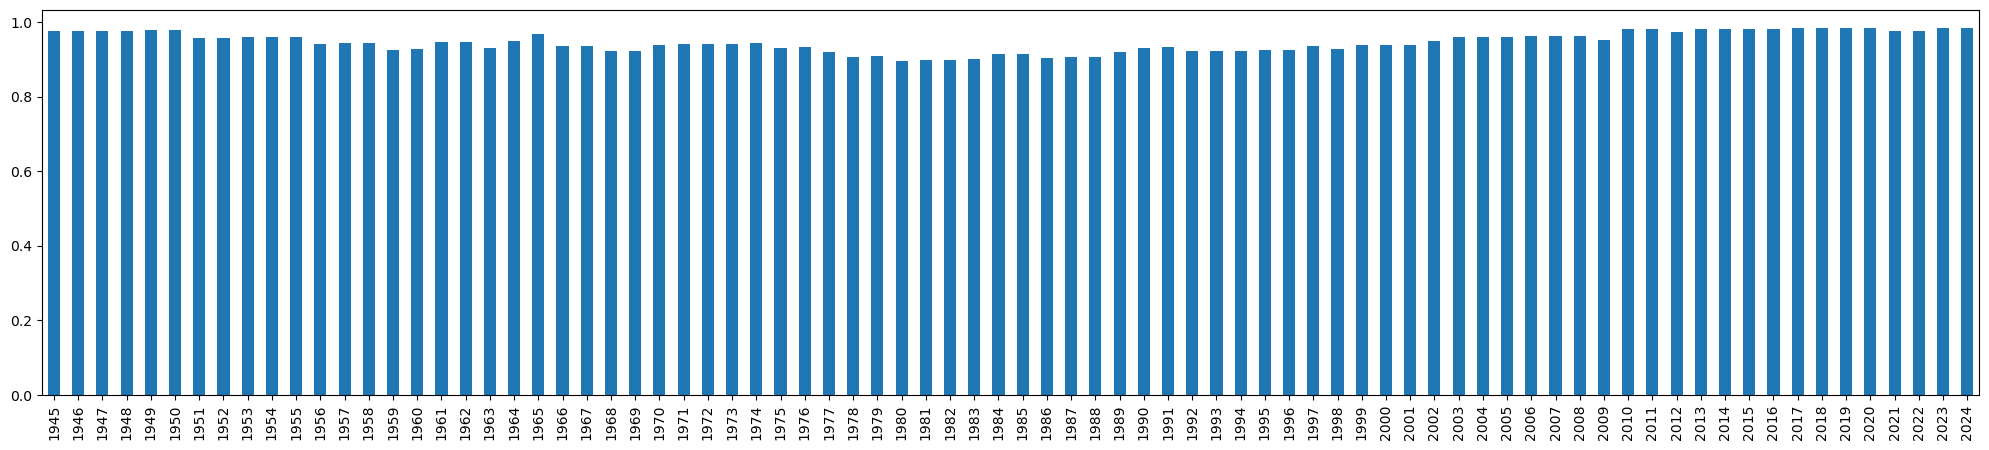

In [1201]:
pd.Series(pronobelovkovanost).tail(80).plot.bar(figsize=(25,5))

In [1202]:
pronobelovkovanost2 = {}
roku = 5
for rok in range(1901, 2025):
    dosavadni = koho[(koho['nobelovka'] > (rok - roku)) & (koho['nobelovka'] <= rok)]['100_7'].drop_duplicates().to_list()
    vydani = df[(df['rok'] <= rok) & (df['100_7'].isin(dosavadni))]['100_7'].drop_duplicates().to_list()
    if rok == 1986:
        osmdesatsest = [x for x in dosavadni if x not in vydani]
    if rok == 1981:
        print(dosavadni)
        print(vydani)
    if len(vydani) != 0:
        pomer = len(vydani) / len(dosavadni)
    else:
        pomer = 0
    if pomer > 1:
        pomer = 1
    pronobelovkovanost2[rok] = pomer

['jn19990000099', 'jn19990007991', 'ola2002161265', 'jn19990001316', 'jn19990005739']
['jn19990001316']


In [1203]:
osmdesatsest

['jn20000605097']

In [1204]:
df[df['100_7'].isin(osmdesatsest)]['100_a'].drop_duplicates().to_list()

[' Wole Soyinka']

<Axes: >

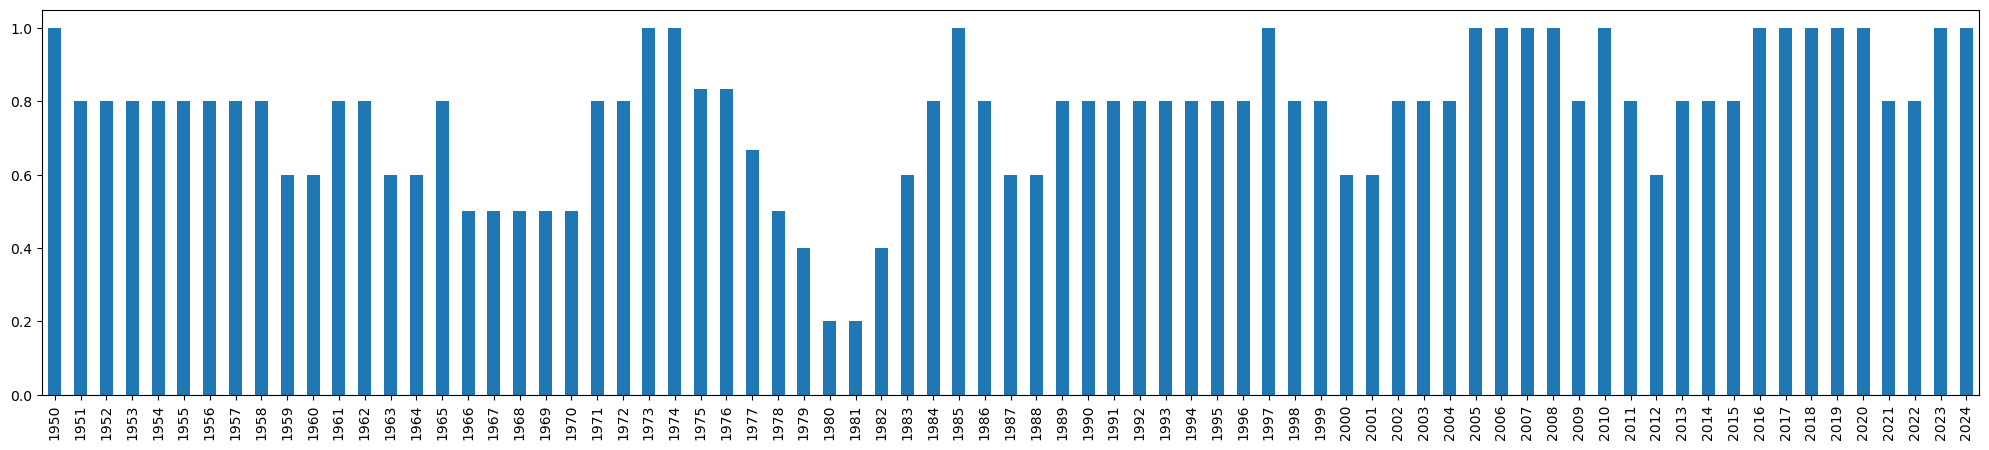

In [1205]:
pd.Series(pronobelovkovanost2).tail(75).plot.bar(figsize=(25,5))

In [1206]:
pronob = pd.Series(pronobelovkovanost2, name='podíl přeložených nobelistů a nobelistek z posledních pěti ročníků').tail(75)

In [1207]:
pronob

1950    1.000000
1951    0.800000
1952    0.800000
1953    0.800000
1954    0.800000
1955    0.800000
1956    0.800000
1957    0.800000
1958    0.800000
1959    0.600000
1960    0.600000
1961    0.800000
1962    0.800000
1963    0.600000
1964    0.600000
1965    0.800000
1966    0.500000
1967    0.500000
1968    0.500000
1969    0.500000
1970    0.500000
1971    0.800000
1972    0.800000
1973    1.000000
1974    1.000000
1975    0.833333
1976    0.833333
1977    0.666667
1978    0.500000
1979    0.400000
1980    0.200000
1981    0.200000
1982    0.400000
1983    0.600000
1984    0.800000
1985    1.000000
1986    0.800000
1987    0.600000
1988    0.600000
1989    0.800000
1990    0.800000
1991    0.800000
1992    0.800000
1993    0.800000
1994    0.800000
1995    0.800000
1996    0.800000
1997    1.000000
1998    0.800000
1999    0.800000
2000    0.600000
2001    0.600000
2002    0.800000
2003    0.800000
2004    0.800000
2005    1.000000
2006    1.000000
2007    1.000000
2008    1.0000

In [1208]:
irozhlas_graf(sloupcovy=[pronob], procenta=[pronob], prvni=False, max_procenta=100, titulek=f'Přeloženost oceněných za pět let nazpátek', podtitulek='Nejizolovanější byla česká kultura na přelomu 70. a 80. let. Přeložení tehdy nebyli Montale (75), Aleixandre (77), Singer (78), Elytis (79) ani Miłosz (80).', target="pronobelkovanost", kredity=['Zdroj dat: Česká národní bibliografie a Wikidata, vizualizace: iROZHLAS.cz','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika'], barvy=["#e63946"])

Graf uložen.


## První vydané knihy nobeliststva

In [1210]:
df.sort_values(by='rok').head(5)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul,rozdil
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjfs00162,010618s1873 xr e 000 j cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Björnstjerne Björnsona Selské novely /],None,[po česku podává Hynek Mejsnar],None,None,None,None,None,None,[1],"[Mejsnar, Hynek Jaroslav,]",[trl],[1837-1895],[jk01081083],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1873.0,1903,Björnstjerne Björnsona Selské novely,-30.0
bknjfs00161,020408s1874 xr e 000 d cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Novomanželé :],[rodinný obraz ve dvou jednáních /],[od Björnstjern Björnsona ; dle Kurzova vzdělá...,None,None,None,None,None,None,[1],"[Pešková, Eliška,]",[trl],[1833-1895],[jk01092674],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1874.0,1903,Novomanželé,-29.0
bknjfs00166,010618s1875 xr e 000 j cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Selské novely /],None,[sepsal Björnson Björnstjerne ; přeložil Hynek...,None,None,None,None,None,None,[1],"[Mejsnar, Hynek Jaroslav,]",[trl],[1837-1895],[jk01081083],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1875.0,1903,Selské novely,-28.0
bknjfs00159,010618s1877 xr e 000 d cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Bankrot :],[činohra ve čtyrech jednáních /],[napsal Bjoernstjerne Bjoernson ; přeložil J. ...,None,None,None,None,None,None,[1],"[Bittner, Jiří,]",[trl],[1846-1903],[jk01012169],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1877.0,1903,Bankrot,-26.0
bknaus04651,221012s1881 xr e 000 d cze,[1],Henryk Sienkiewicz,jn19990007946,[aut],[1846-1916],None,None,None,None,[1],[0],[Na jednu kartu :],[drama v pěti jednáních /],[od Henryka Sienkieviče-Litvose ; z polského p...,None,None,None,None,None,None,[1],"[Frič, Coelestin,]",[trl],[1856-1886],[jk01031864],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1881.0,1905,Na jednu kartu,-24.0


In [1211]:
df.groupby('100_a')['rok'].min().nlargest(10)

100_a
Abdulrazak Gurnah    2023.0
Kang Han             2017.0
Yan Mo               2013.0
Jiorgos Seferis      2011.0
Derek Walcott        2010.0
Herta Müller         2010.0
Xingjian Gao         2010.0
Louise Glück         2007.0
Orhan Pamuk          2006.0
Alice Munro          2003.0
Name: rok, dtype: float64

## Nejvydávanější

In [1213]:
df.groupby('100_a')['titul'].nunique().nlargest(150)

100_a
 Jaroslav Seifert                        151
 Rudyard Kipling                          78
 Henryk Sienkiewicz                       66
 Anatole France                           65
 Bernard Shaw                             60
 Romain Rolland                           55
 Thomas Mann                              39
 Hermann Hesse                            39
 John Galsworthy                          37
 Isaac Bashevis Singer                    37
 Rabíndranáth Thákur                      37
 Luigi Pirandello                         36
 Knut Hamsun                              33
 Selma Lagerlöf                           33
 Bjørnstjerne Bjørnson                    33
 Maurice Maeterlinck                      31
 Władysław Stanisław Reymont              25
 Ivan Aleksejevič Bunin                   25
 John Steinbeck                           24
 André Gide                               24
 Sinclair Lewis                           24
 Gabriel García Márquez                   23
 Wil

In [1214]:
df.groupby('100_7')['titul'].nunique().reindex(koho['100_7'].to_list()).nlargest(150)

100_7
jk01110657           151.0
jn19990004353         78.0
jn19990007946         66.0
jn19981001227         65.0
jn19990007481         60.0
jn19990007118         55.0
jn19990003467         39.0
jn19990005365         39.0
jn19990002542         37.0
jn19990007991         37.0
jn19981002206         37.0
jn20000604446         36.0
jn19990000824         33.0
jn19990004817         33.0
jn20000602790         33.0
jn19990005277         31.0
jn19990006988         25.0
jn19990210139         25.0
jn19990002664         24.0
jn19990008205         24.0
jn19990005053         24.0
jn19981001318         23.0
jn19990002183         23.0
jn19990003371         22.0
jn20000604273         22.0
jn19990008691         20.0
jn19990001184         20.0
jn19990005491         19.0
jn19990006057         19.0
jn19990003245         19.0
jn19990001315         18.0
jn19990002840         18.0
jn19990000996         18.0
jn19990007359         16.0
jn20010601143         16.0
jn19990009341         16.0
jn19990008739         

## Kolik toho vyšlo

In [1216]:
df[['100_7','titul']].shape

(3137, 2)

In [1217]:
df[['100_7','titul']].drop_duplicates().shape

(1744, 2)

In [1218]:
df[~df['100_a'].str.contains('Seifert',na=False)][['100_7','titul']].drop_duplicates().shape

(1593, 2)

## Kdy se vydávají

In [1220]:
vysli_pred = df[df['rozdil'] <= 0].sort_values(by='nobelovka',ascending=False)['100_a'].drop_duplicates().to_list()

In [1221]:
len(vysli_pred) / len(df['100_a'].drop_duplicates())

0.7166666666666667

In [1222]:
df.groupby("100_a")['rok'].min().nlargest()

100_a
Abdulrazak Gurnah    2023.0
Kang Han             2017.0
Yan Mo               2013.0
Jiorgos Seferis      2011.0
Derek Walcott        2010.0
Name: rok, dtype: float64

In [1223]:
df[df['rozdil'] > 0].groupby('100_a')[['rozdil','nobelovka']].min().sort_values(by='nobelovka',ascending=False)

,rozdil,nobelovka
100_a,,
Annie Ernaux,1.0,2022
Abdulrazak Gurnah,2.0,2021
Louise Glück,2.0,2020
Peter Handke,1.0,2019
Olga Tokarczuk,2.0,2018
Kazuo Ishiguro,1.0,2017
Bob Dylan,2.0,2016
Svjatlana Aljaksandraŭna Aleksìjevìč,1.0,2015
Patrick Modiano,3.0,2014


In [1224]:
df[~df['100_a'].isin(vysli_pred)].groupby('100_a')[['rozdil','nobelovka']].min().sort_values(by='nobelovka',ascending=False)

,rozdil,nobelovka
100_a,,
Abdulrazak Gurnah,2.0,2021
Yan Mo,1.0,2012
Tomas Tranströmer,NaN,2011
Herta Müller,1.0,2009
Xingjian Gao,10.0,2000
José Saramago,4.0,1998
Derek Walcott,18.0,1992
Iosif Aleksandrovič Brodskij,10.0,1987
Wole Soyinka,3.0,1986


In [1225]:
df[df['rozdil'] > 0].groupby('100_a')[['rozdil','nobelovka']].min().sort_values(by='nobelovka',ascending=False)

,rozdil,nobelovka
100_a,,
Annie Ernaux,1.0,2022
Abdulrazak Gurnah,2.0,2021
Louise Glück,2.0,2020
Peter Handke,1.0,2019
Olga Tokarczuk,2.0,2018
Kazuo Ishiguro,1.0,2017
Bob Dylan,2.0,2016
Svjatlana Aljaksandraŭna Aleksìjevìč,1.0,2015
Patrick Modiano,3.0,2014


In [1226]:
df[df['rozdil'] > 0].groupby('100_a')['rozdil'].min().nlargest(10)

100_a
 Jiorgos Seferis                  48.0
 Winston Churchill                39.0
Sully Prudhomme                   36.0
 Theodor Mommsen                  35.0
 Nelly Sachs                      34.0
 Claude Simon                     33.0
 Shmuel Yosef Agnon               33.0
 Gabriela Mistral                 25.0
 Odysseus Elytis                  24.0
 Aleksandr Isajevič Solženicyn    20.0
Name: rozdil, dtype: float64

<Axes: xlabel='nobelovka'>

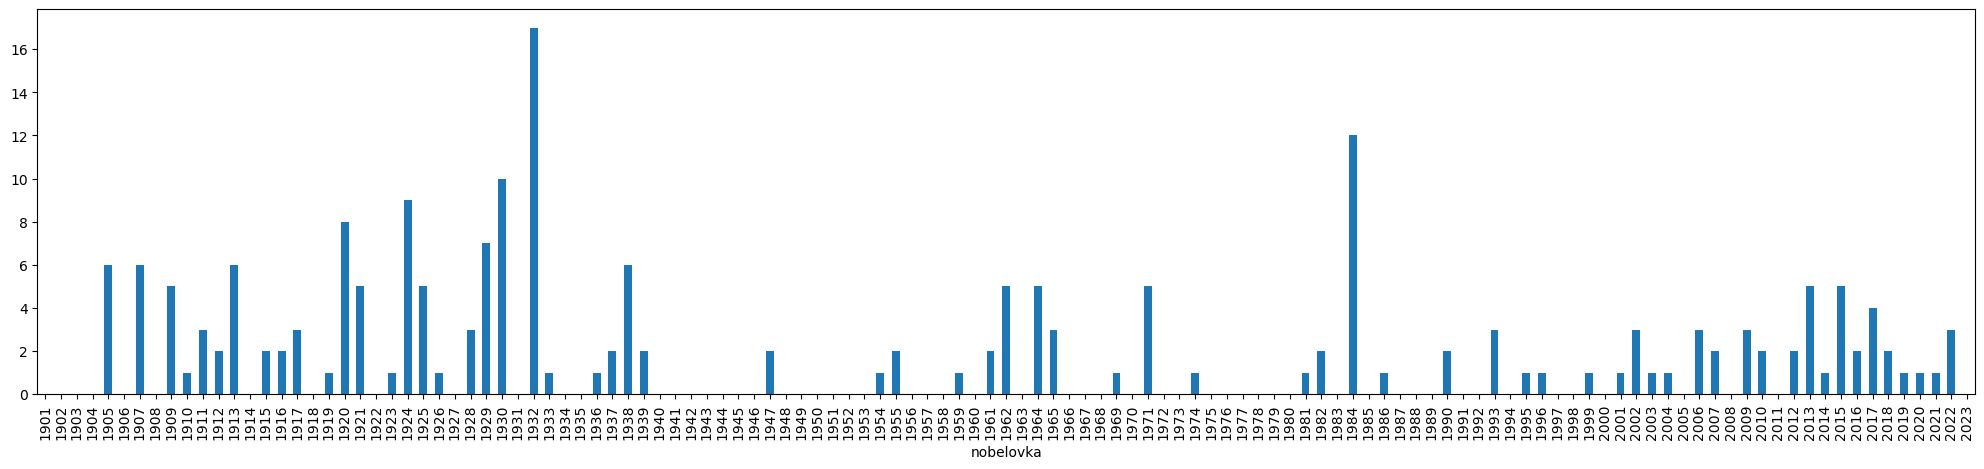

In [1227]:
df[df['rozdil'].isin([1,2,3])].groupby('nobelovka')['titul'].nunique().reindex([r for r in range(1901,2024)]).plot.bar(figsize=(25,5))

In [1228]:
df.groupby('100_a')['rozdil'].min().median()

-11.0

<Axes: ylabel='Frequency'>

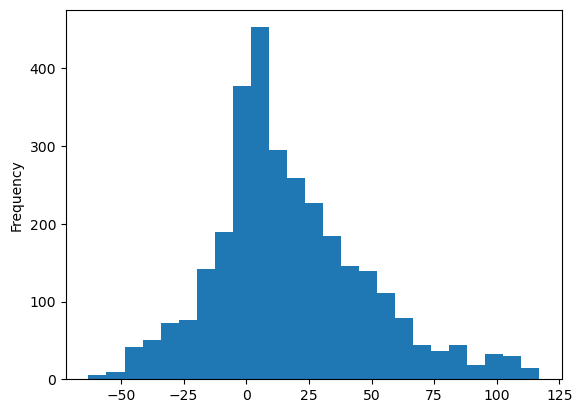

In [1229]:
df['rozdil'].plot.hist(bins=25)

In [1230]:
podil = 0
odpocitadlo = 0
while podil < 0.5:
    odpocitadlo = odpocitadlo + 1
    podil = len( df[(df['rozdil'] > 0) & (df['rozdil'] <= odpocitadlo)]) / len(df['rozdil'])
    print(podil)
print(odpocitadlo)

0.027414727446605038
0.051004144086707046
0.07523111252789288
0.09722664966528531
0.11475932419509086
0.13324832642652215
0.15301243226012112
0.17182021039209436
0.1842524705132292
0.19827861013707362
0.21294230156200192
0.22505578578259483
0.23461906279885242
0.24864520242269683
0.255977048135161
0.2658591010519605
0.2808415683774307
0.29231750079693974
0.30219955371373924
0.31558814153649983
0.32547019445329933
0.33726490277335036
0.3484220592923175
0.35926043991074275
0.3710551482307938
0.3809372011475932
0.38922537456168316
0.39783232387631495
0.40771437679311445
0.42078418871533313
0.4338540006375518
0.4427797258527255
0.4536181064711508
0.46126872808415686
0.46923812559770484
0.47433854000637554
0.47943895441504625
0.48772712782913613
0.4944214217405164
0.5014344915524387
40


In [1231]:
df['rozdil'].size

3137

<Axes: ylabel='Frequency'>

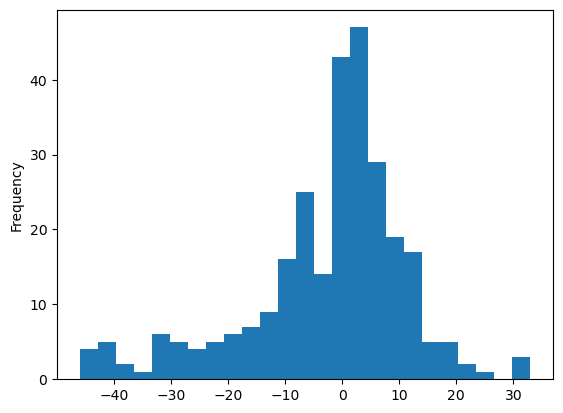

In [1232]:
df[df['nobelovka'] >= 1990]['rozdil'].plot.hist(bins=25)

In [1233]:
df[df['rozdil'] < 0].groupby('100_a')['titul'].nunique().nlargest()

100_a
Jaroslav Seifert      109
Henryk Sienkiewicz     41
Anatole France         25
André Gide             23
John Galsworthy        19
Name: titul, dtype: int64

In [1234]:
df.groupby('100_a')['rozdil'].min().nlargest(200)

100_a
 Jiorgos Seferis                         48.0
Sully Prudhomme                          36.0
 Theodor Mommsen                         35.0
 Nelly Sachs                             34.0
 Shmuel Yosef Agnon                      33.0
 Gabriela Mistral                        25.0
 Odysseus Elytis                         24.0
 Derek Walcott                           18.0
 Jacinto Benavente                       17.0
 Yasunari Kawabata                       16.0
 Pär Lagerkvist                          13.0
 Xingjian Gao                            10.0
 Czesław Miłosz                          10.0
 Iosif Aleksandrovič Brodskij            10.0
 Isaac Bashevis Singer                    9.0
 Erik Axel Karlfeldt                      8.0
 Frédéric Mistral                         8.0
 Rudolf Eucken                            6.0
Saint-John Perse                          5.0
 Juan Ramón Jiménez                       5.0
 Eugenio Montale                          4.0
 José Saramago              

In [1235]:
poradi = df[['100_a','nobelovka']].sort_values(by='nobelovka')
poradi = poradi['100_a'].drop_duplicates().to_list()

In [1236]:
df.groupby('100_a')['rozdil'].min().reindex(poradi)

100_a
Sully Prudhomme                          36.0
 Theodor Mommsen                         35.0
 Bjørnstjerne Bjørnson                  -30.0
 Frédéric Mistral                         8.0
 José Echegaray                         -12.0
 Henryk Sienkiewicz                     -24.0
 Giosue Carducci                        -16.0
 Rudyard Kipling                        -14.0
 Rudolf Eucken                            6.0
 Selma Lagerlöf                          -8.0
 Paul Heyse                               3.0
 Maurice Maeterlinck                    -11.0
 Gerhart Hauptmann                      -17.0
 Rabíndranáth Thákur                      1.0
 Romain Rolland                           1.0
 Verner von Heidenstam                    0.0
 Henrik Pontoppidan                     -22.0
 Karl Adolf Gjellerup                     2.0
 Carl Spitteler                           2.0
 Knut Hamsun                            -23.0
 Anatole France                         -26.0
 Jacinto Benavente          

<Axes: xlabel='100_a'>

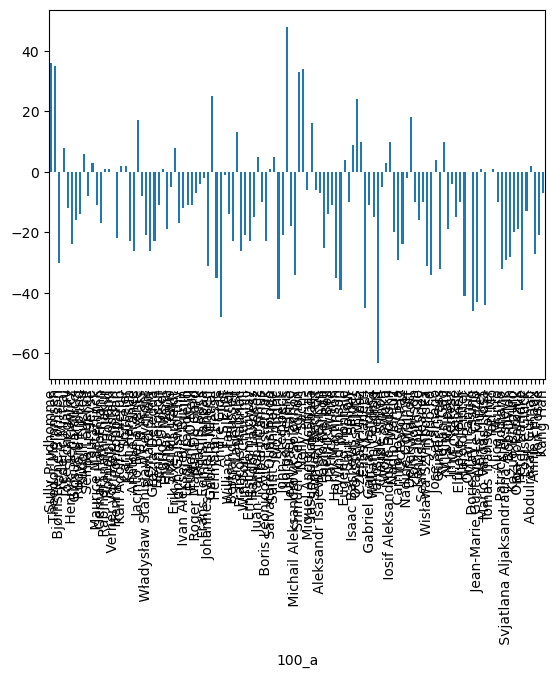

In [1237]:
df.groupby('100_a')['rozdil'].min().reindex(poradi).plot.bar()

In [1238]:
len(df[df['rozdil'].isin([1,2,3])]) / len(df[df['rozdil'].isin([-1,-2,-3])])

1.8153846153846154

In [1239]:
df.groupby('100_7')['rozdil'].min().nlargest(200)

100_7
jn20000402202        48.0
xx0005044            36.0
skuk0000903          35.0
jn20000810312        34.0
jn20000600054        33.0
jn19981001854        25.0
ola2002161265        24.0
kup19950000109491    18.0
jn19990000655        17.0
jn20000603323        16.0
jn19990004816        13.0
jn19990001110        10.0
jo20000075484        10.0
jn19990005739        10.0
jn19990007991         9.0
jo20000080728         8.0
xx0047446             8.0
skuk0000369           6.0
jn19990007305         5.0
jn19981001567         5.0
xx0001988             4.0
jn20000604067         4.0
jn20000605097         3.0
jn20000700710         3.0
jn20010420012         2.0
jn20010602599         2.0
xx0011793             2.0
jn19990005954         1.0
jn19981002206         1.0
kv2013742559          1.0
jn20000604537         1.0
jn19990007118         1.0
jn19990008691         1.0
jn19990003311         0.0
jo2006321171          0.0
jn19990002039        -1.0
jn19990002779        -2.0
xx0003184            -2.0
jn2000

## Velký graf

In [1241]:
vsechny_roky = koho['nobelovka'].to_list()

In [1242]:
chybejici_roky = [x for x in vsechny_roky if x not in df['nobelovka'].to_list()]
chybejici_roky

[1977]

In [1243]:
rucni_doplneni = pd.DataFrame([{'100_a': 'Tomas Tranströmer', 'nobelovka': 2011, 'rozdil': 3, 'titul': 'Přijde smrt a vezme ti míry', 'rok': 2014}, {'100_a': 'Vicente Aleixandre', 'nobelovka': 1977, 'rozdil': None, 'rok': None, 'titul': None}, {'100_a':'Jon Fosse','nobelovka':2023,'rozdil':1,'rok':2024,'titul':'To je Ales'}])

In [1244]:
dografu = df[(df['rozdil'] <= df.groupby('100_7')['rozdil'].min().max())][['100_a','rozdil','nobelovka','titul','rok']] # .rename(columns={'100_a':'jméno','rozdil':'vydání před/po nobelovce'})

In [1245]:
rucni_doplneni

,100_a,nobelovka,rozdil,titul,rok
0,Tomas Tranströmer,2011,3.0,Přijde smrt a vezme ti míry,2014.0
1,Vicente Aleixandre,1977,NaN,None,NaN
2,Jon Fosse,2023,1.0,To je Ales,2024.0


In [1246]:
dografu = pd.concat([rucni_doplneni, dografu], ignore_index=True, axis=0).sort_values('nobelovka',ascending=False)

In [1247]:
# dografu = dografu.sample(5)

In [1248]:
dografu['100_a'] = dografu.apply(lambda row: f"{row['100_a'].split( )[-1].strip()} ({row['nobelovka']})", axis=1)

In [1249]:
dografu[dografu['titul'].str.contains(" la ",na=False)]

,100_a,nobelovka,rozdil,titul,rok
2323,Paz (1990),1990,25.0,"Sor Juana Inés de la Cruz, aneb, Nástrahy víry",2015.0


In [1250]:
len(dografu)

2601

In [1251]:
kategorie = [f'"{x.strip()}"' for x in dografu['100_a'].drop_duplicates().to_list()][::-1]

In [1252]:
serie = []
pocitadlo = 0
for x in dografu.sort_values("nobelovka")['100_a'].drop_duplicates().to_list():
    slovnik = {}
    slovnik['name'] = x
    slovnik['data'] = []
    for index, radek in dografu[dografu['100_a'] == x].iterrows():
        if radek['rozdil'] <= 0:
            barva = "#e63946"
        else:
            barva = "#3E80B6"
        slovnicek = {}
        slovnik['data'].append({'x': radek['rozdil'], 'y': pocitadlo, 'titul': radek['titul'], 'rok': radek['rok'], 'color': barva})
    serie.append(slovnik)
    pocitadlo = pocitadlo + 1

In [1253]:
pocitadlo

121

In [1254]:
with open(os.path.join("src","scatter_template.html"), "r", encoding="utf-8") as template:
    template = template.read()
export_grafu = template.replace("TITULEK","Jak brzy či pozdě vycházeli nobelisté česky").replace("OSA_X","let před Nobelovou cenou za literaturu a po ní").replace("KATEGORIE",f"[{','.join(kategorie)}]").replace('SERIE',str(serie).replace(' nan,',' null,').replace(' None,',' null,'))
with open(os.path.join("grafy","scatter_nobelovky_export.html"), "w+", encoding="utf-8") as vystupni_graf:
    vystupni_graf.write(export_grafu)
with open(os.path.join("grafy","scatter_nobelovky_export.txt"), "w+", encoding="utf-8") as vystupni_graf:
    vystupni_graf.write(export_grafu.replace('<html><body>','').replace('</body></html>',''))

## Pro Yuhůa

<Axes: xlabel='rok'>

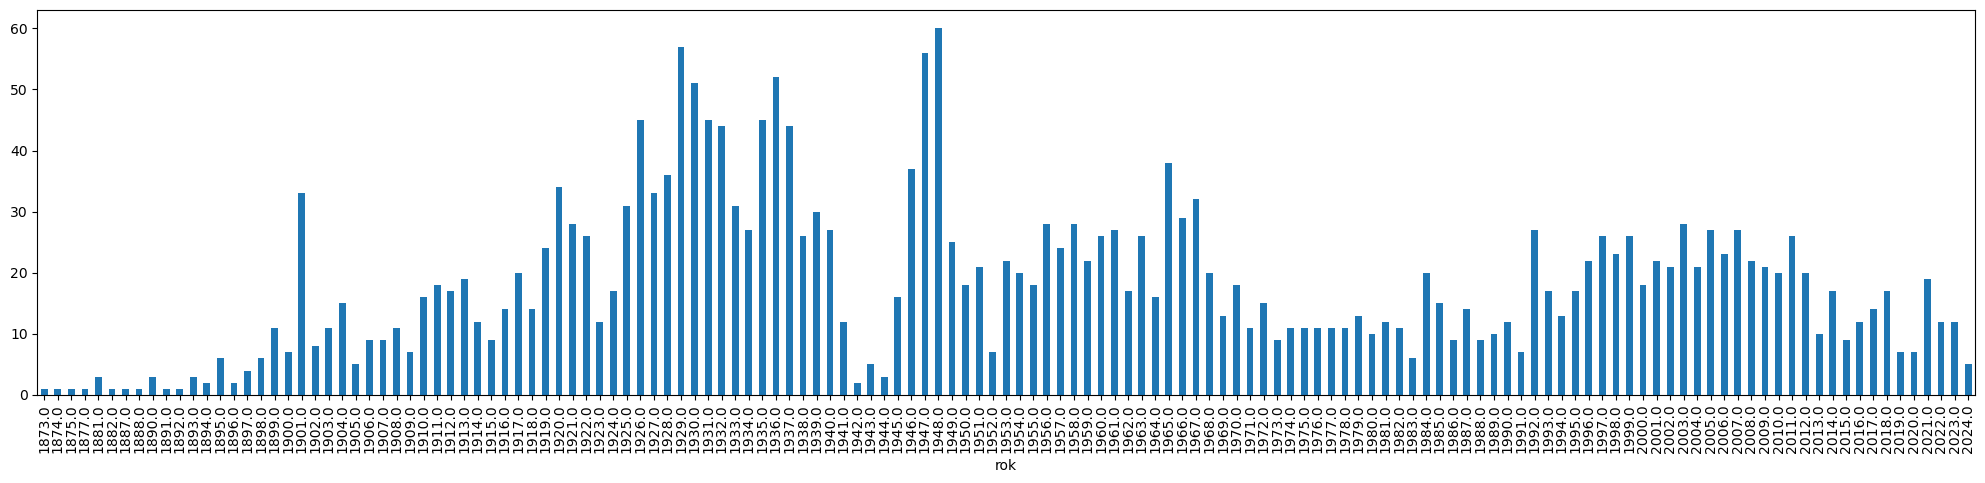

In [1256]:
dografu.groupby('rok').size().plot.bar(figsize=(25,5))

## Kdo to překládá

In [1258]:
prekladatelstvo = df.dropna(subset=['700_4','700_7','700_a']).explode(['700_4','700_7','700_a'])

In [1259]:
prekladatelstvo[prekladatelstvo['700_4'] == 'trl'].groupby('700_a')['100_a'].nunique().nlargest(10)

700_a
Kondrysová, Eva,                6
Krausová-Lesná, Milada,         6
Valja, Jiří,                    6
Hackenschmied, Hanuš,           5
Vrba, František,                5
Eisner, Pavel,                  4
Hron, Zdeněk,                   4
Kosterka, Hugo,                 4
Köllnová-Ehrmannová, Božena,    4
Nenadál, Radoslav,              4
Name: 100_a, dtype: int64